<a href="https://colab.research.google.com/github/ashrafkvt/CameraApp/blob/main/analyse_product_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
!pip install wget

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=3929d64b260bca6c2a6a69c436f144cad06d9a55ec55199346fd7382bc0f40d6
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [3]:
import wget
import pandas

download_url = 'https://drive.google.com/uc?id=1xWJB7wmUWkJFiu-T-mN98Cz0Y9boTAmT'
filename = wget.download(download_url)

df = pd.read_csv(filename)
df

,Name,Email,Product,Transaction Date
0,PERSON_1,PERSON_1@gmail.com,PRODUCT_75,01/03/2021 00:47:26
1,PERSON_2,PERSON_2@tataprojects.com,PRODUCT_75,01/03/2021 02:04:07
2,PERSON_3,PERSON_3@gmail.com,PRODUCT_63,01/03/2021 09:10:43
3,PERSON_4,PERSON_4@gmail.com,PRODUCT_63,01/03/2021 09:49:48
4,PERSON_5,PERSON_5@gmail.com,"PRODUCT_34,PRODUCT_86,PRODUCT_57,PRODUCT_89",01/03/2021 10:56:46
...,...,...,...,...
576,PERSON_522,PERSON_522@gmail.com,"PRODUCT_48,PRODUCT_80,PRODUCT_71,PRODUCT_68,PR...",07/03/2021 23:53:03
577,PERSON_523,PERSON_523@gmail.com,PRODUCT_8,07/03/2021 23:55:01
578,PERSON_523,PERSON_523@gmail.com,"PRODUCT_36,PRODUCT_14,PRODUCT_64,PRODUCT_28,PR...",07/03/2021 23:58:24
579,PERSON_524,PERSON_524@gmail.com,"PRODUCT_75,PRODUCT_71,PRODUCT_86,PRODUCT_63,PR...",07/03/2021 23:59:26


In [4]:
df['Time'] = pd.to_datetime(df['Transaction Date'])
df['Hour'] = df['Time'].dt.hour
df

,Name,Email,Product,Transaction Date,Time,Hour
0,PERSON_1,PERSON_1@gmail.com,PRODUCT_75,01/03/2021 00:47:26,2021-01-03 00:47:26,0
1,PERSON_2,PERSON_2@tataprojects.com,PRODUCT_75,01/03/2021 02:04:07,2021-01-03 02:04:07,2
2,PERSON_3,PERSON_3@gmail.com,PRODUCT_63,01/03/2021 09:10:43,2021-01-03 09:10:43,9
3,PERSON_4,PERSON_4@gmail.com,PRODUCT_63,01/03/2021 09:49:48,2021-01-03 09:49:48,9
4,PERSON_5,PERSON_5@gmail.com,"PRODUCT_34,PRODUCT_86,PRODUCT_57,PRODUCT_89",01/03/2021 10:56:46,2021-01-03 10:56:46,10
...,...,...,...,...,...,...
576,PERSON_522,PERSON_522@gmail.com,"PRODUCT_48,PRODUCT_80,PRODUCT_71,PRODUCT_68,PR...",07/03/2021 23:53:03,2021-07-03 23:53:03,23
577,PERSON_523,PERSON_523@gmail.com,PRODUCT_8,07/03/2021 23:55:01,2021-07-03 23:55:01,23
578,PERSON_523,PERSON_523@gmail.com,"PRODUCT_36,PRODUCT_14,PRODUCT_64,PRODUCT_28,PR...",07/03/2021 23:58:24,2021-07-03 23:58:24,23
579,PERSON_524,PERSON_524@gmail.com,"PRODUCT_75,PRODUCT_71,PRODUCT_86,PRODUCT_63,PR...",07/03/2021 23:59:26,2021-07-03 23:59:26,23


In [5]:
type(df['Time'])

pandas.core.series.Series

In [6]:
most_hours = df['Hour'].value_counts().index.tolist()[:24]
most_hours_count = df['Hour'].value_counts().values.tolist()[:24]
tmost = np.column_stack((most_hours, most_hours_count))
print(" Hour Of Day" + "\t" + "Cumulative Number of Purchases \n")
print('\n'.join('\t\t'.join(map(str, row)) for row in tmost))

 Hour Of Day	Cumulative Number of Purchases 

23		51
12		51
22		45
19		42
21		41
15		41
20		39
11		37
13		33
18		33
16		29
14		28
17		27
10		24
0		17
9		14
8		10
7		6
1		4
2		3
5		3
6		2
3		1


In [7]:
timemost = df['Hour'].value_counts()
timemost1 = [item for item in timemost]

timemost2 = timemost.sort_index()
timemost2.to_list()
timemost2 = pd.DataFrame(timemost2)
timemost2

,count
Hour,
0,17
1,4
2,3
3,1
5,3
6,2
7,6
8,10
9,14


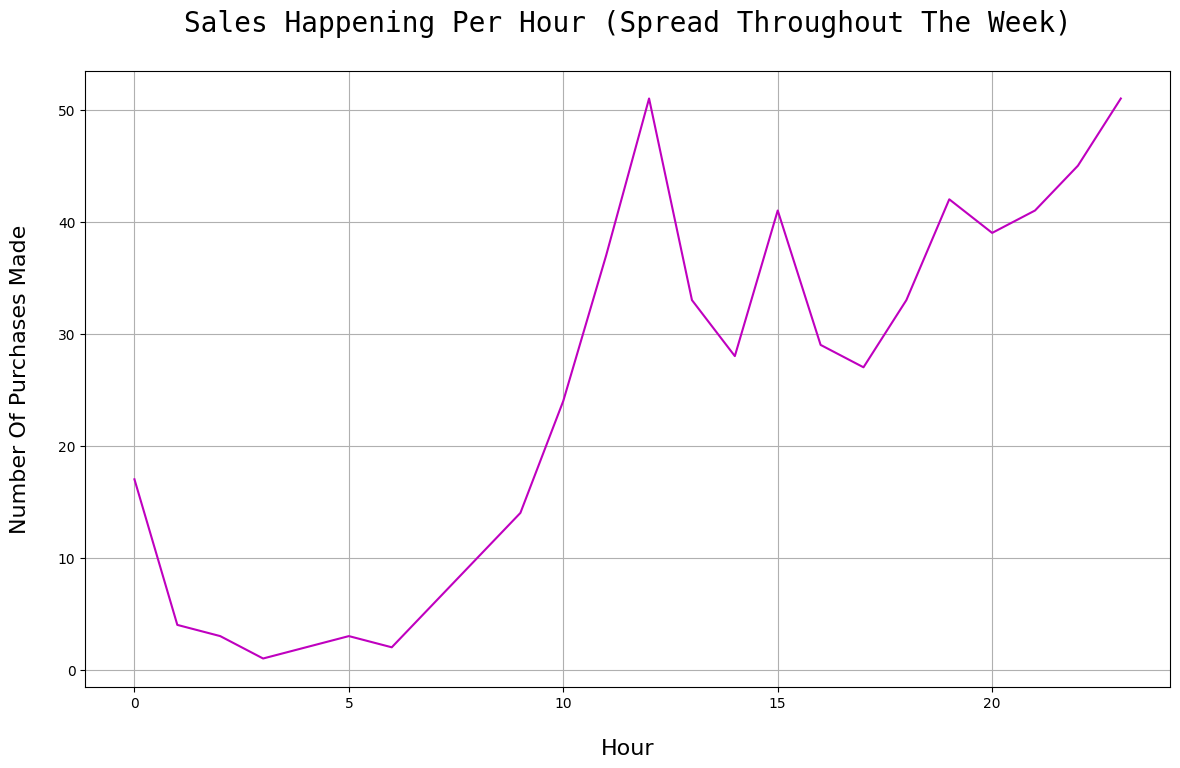

In [39]:
hours = timemost.sort_index().index
purchase_count = timemost.sort_index().values

plt.figure(figsize=(14, 8))

plt.title('Sales Happening Per Hour (Spread Throughout The Week)',
          fontdict={'fontname': 'monospace', 'fontsize': 20}, y=1.05)

plt.ylabel("Number Of Purchases Made", fontsize=16, labelpad=20)
plt.xlabel("Hour", fontsize=16, labelpad=20)
plt.plot(hours, purchase_count, color='m')

plt.grid()
plt.show()
